In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Synthetic data

series = np.sin((0.1*np.arange(800))**2)

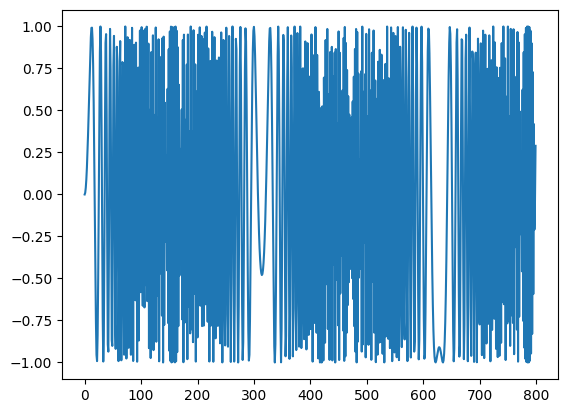

In [ ]:
plt.plot(series)
plt.show()

In [ ]:
#Build the data

T = 10
X = []
Y = []

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X)

Y = np.array(Y).reshape(-1,1)

X.shape, Y.shape

((790, 10), (790, 1))

In [ ]:
#SPlit the data
N = len(X)
X_train =  torch.from_numpy(X[:N//2].astype("float32"))
X_test = torch.from_numpy(X[N//2:].astype("float32"))
Y_train = torch.from_numpy(Y[:N//2].astype("float32"))
Y_test = torch.from_numpy(Y[N//2:].astype("float32"))

X_train.shape,X_test.shape,Y_train.shape , Y_test.shape

(torch.Size([395, 10]),
 torch.Size([395, 10]),
 torch.Size([395, 1]),
 torch.Size([395, 1]))

In [ ]:
#model

model = nn.Linear(10,1)

In [ ]:
#optimizer

criterion = nn.MSELoss()
optimizer  = torch.optim.Adam(model.parameters(),lr=0.01)


In [ ]:
#training

epochs = 500

train_loss = np.zeros(epochs)

test_loss  = np.zeros(epochs)

for i in range(epochs):

  optimizer.zero_grad()

  outputs  =  model(X_train)

  loss  = criterion(outputs, Y_train)

  loss.backward()

  optimizer.step()

  train_loss[i] = loss.item()

  o = model(X_test)

  loss_test = criterion(o,Y_test)

  test_loss[i] = loss_test.item()

  print(f"epochs -- {i+1}/{epochs} , training loss -- {loss.item()} , test loss -- {loss_test.item()}")


epochs -- 1/500 , training loss -- 0.6109309792518616 , test loss -- 0.632199764251709
epochs -- 2/500 , training loss -- 0.5991302728652954 , test loss -- 0.6224064826965332
epochs -- 3/500 , training loss -- 0.5881221294403076 , test loss -- 0.6139938831329346
epochs -- 4/500 , training loss -- 0.5780304074287415 , test loss -- 0.6061517000198364
epochs -- 5/500 , training loss -- 0.5688096880912781 , test loss -- 0.5986105799674988
epochs -- 6/500 , training loss -- 0.5603857040405273 , test loss -- 0.5916175842285156
epochs -- 7/500 , training loss -- 0.5526884198188782 , test loss -- 0.5853213667869568
epochs -- 8/500 , training loss -- 0.5456379055976868 , test loss -- 0.5797675848007202
epochs -- 9/500 , training loss -- 0.5391584634780884 , test loss -- 0.5749611854553223
epochs -- 10/500 , training loss -- 0.5331918001174927 , test loss -- 0.5708440542221069
epochs -- 11/500 , training loss -- 0.5277019143104553 , test loss -- 0.5672996640205383
epochs -- 12/500 , training los

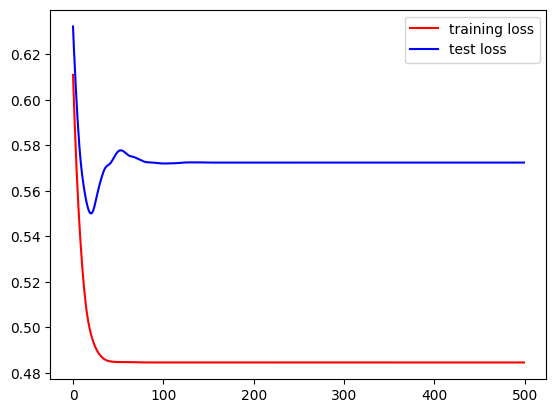

In [ ]:
plt.plot(train_loss, label = "training loss", c = "r")
plt.plot(test_loss, label = "test loss", c = "b")
plt.legend()
plt.show()

In [ ]:
#one step forecasting

test_predictions  = model(X_test).detach().numpy()




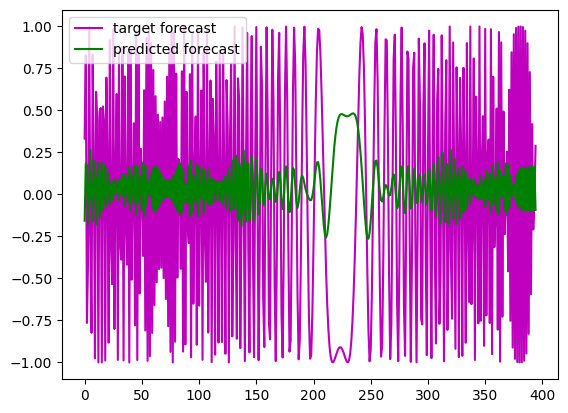

In [ ]:

plt.plot(Y_test.numpy(), label = "target forecast", c = "m")
plt.plot(test_predictions, label = "predicted forecast", c = "g")
plt.legend()
plt.show()

In [ ]:
#multistep forecasting

test_predictions = []

last_x = X_test[0]

while len(test_predictions) < len(X_test):

  out = model(last_x)

  test_predictions.append(out.item())

  x = torch.cat((last_x[1:],out))

  last_x = x







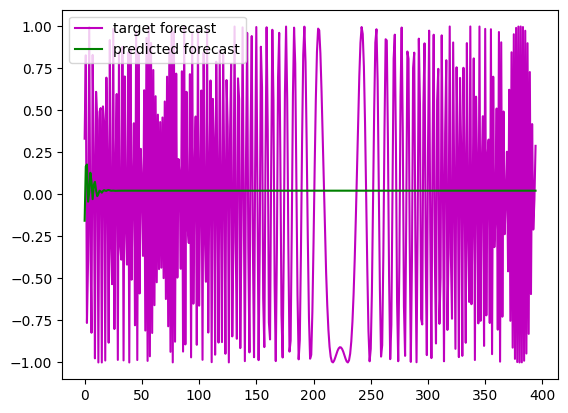

In [ ]:
plt.plot(Y_test.numpy(), label = "target forecast", c = "m")
plt.plot(test_predictions, label = "predicted forecast", c = "g")
plt.legend()
plt.show()